#Matching Pennies


In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def reward(a1, a2): #reward player 1
  return a1*a2

In [43]:
def policy(pi_H, pi_H_reg):
  # Return the action, the probability of taking that action, and the probability of taking that action under the regular policy
  if np.random.rand() <= pi_H:
    a = 1 #H
    p = pi_H
    p_reg = pi_H_reg
  else:
    a = -1 #T
    p = 1-pi_H
    p_reg = 1-pi_H_reg
  return a, p, p_reg

# FoReL with Monte Carlo estimation of the Q-values

In [44]:
from tqdm import tqdm

np.random.seed(0)

p1_H_reg = 0.6
p2_H_reg = 0.4
nu = 0
mu =  0.001
n_episode_monte_carlo = 20
curve = [(p1_H_reg, p2_H_reg)]

for n in tqdm(range(1,10000)):
  # Initialize policies
  p1_H, p2_H = p1_H_reg, p2_H_reg
  # Run replicator dynamics (FoReL) to find a fix point
  for e in range(10):
    # Monte Carlo for expectation estimation
    Q1_H, Q1_T, Q2_H, Q2_T = 0, 0, 0, 0     # Q_i(a) for i in {1,2} and a in {H,T}
    
    for i in range(n_episode_monte_carlo):
      a2, p2, p2_reg = policy(p2_H, p2_H_reg)
      # print(nu*np.log(p1_H/p1_H_reg))
      Q1_H += reward(1,a2) - nu*np.log(p1_H/p1_H_reg) + nu*np.log(p2/p2_reg)
      Q1_T += reward(-1,a2) - nu*np.log((1-p1_H)/(1-p1_H_reg)) + nu*np.log(p2/p2_reg)

      a1, p1, p1_reg = policy(p1_H, p1_H_reg)
      Q2_H += -reward(a1,1) - nu*np.log(p2_H/p2_H_reg) + nu*np.log(p1/p1_reg)
      Q2_T += -reward(a1,-1) - nu*np.log((1-p2_H)/(1-p2_H_reg)) + nu*np.log(p1/p1_reg)

    Q1_H = Q1_H/n_episode_monte_carlo
    Q1_T = Q1_T/n_episode_monte_carlo
    Q2_H = Q2_H/n_episode_monte_carlo
    Q2_T = Q2_T/n_episode_monte_carlo

    # V1 = p1_H*Q1_H + (1-p1_H)*Q1_T
    # V2 = p2_H*Q2_H + (1-p2_H)*Q2_T
    # p1_H = p1_H + mu*p1_H*(Q1_H - V1) # (1/n**x) : More smooth by leveraging x vs trade-off convergence speed
    # p2_H = p2_H + mu*p2_H*(Q2_H - V2)
    
    p1_H = p1_H + mu*p1_H*(1-p1_H)*(Q1_H - Q1_T) # (1/n**x) : More smooth by leveraging x vs trade-off convergence speed
    p2_H = p2_H + mu*p2_H*(1-p2_H)*(Q2_H - Q2_T) # (1/n**x) : More smooth by leveraging x vs trade-off convergence speed
    # print( mu*p1_H*(1-p1_H)*(Q1_H - Q1_T))
    # print( mu*p2_H*(1-p2_H)*(Q2_H - Q2_T))
    #max((1/n**2), 0.001)
  p1_H_reg = p1_H
  p2_H_reg = p2_H
  curve.append((p1_H_reg,p2_H_reg))

100%|██████████| 9999/9999 [00:12<00:00, 778.32it/s]


In [45]:
p1_H_reg, p2_H_reg

(0.36290928671363176, 0.6034521237786662)

In [46]:

plt.figure(figsize=(100,100))
curve = np.array(curve)
#plt.scatter(curve[:,0], curve[:,1])
plt.scatter(curve[-1,0], curve[-1,1], c='r')
plt.scatter(curve[0,0], curve[0,1], c='y')
plt.plot(curve[:,0], curve[:,1], c='k')

plt.xlabel('$\pi^{1}(H)$')
plt.ylabel('$\pi^{2}(H)$')
plt.title('Fix points convergence')

Text(0.5, 1.0, 'Fix points convergence')

#Zoom in by discarding the 10 first points

Text(0.5, 1.0, 'Fix points convergence')

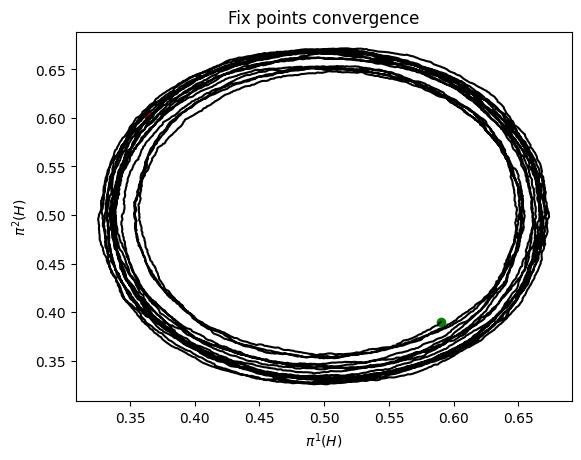

In [47]:
#plt.scatter(curve[10:,0], curve[10:,1])
plt.scatter(curve[10,0], curve[10,1], c='g')
plt.scatter(curve[-1,0], curve[-1,1], c='r')
plt.plot(curve[10:,0], curve[10:,1], c='k')

plt.xlabel('$\pi^{1}(H)$')
plt.ylabel('$\pi^{2}(H)$')
plt.title('Fix points convergence')